# 1. Data

## 1.1 Import Data

In [112]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Data_Competition_2.ipynb',
 'IST 5520 Data Competition II.pdf',
 'test.csv',
 'train.csv',
 'Yao_data competition 2.ipynb']

In [5]:
train_dat = pd.read_csv('train.csv')

In [6]:
train_dat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [7]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 17 columns):
age          22606 non-null int64
job          22606 non-null object
marital      22606 non-null object
education    22606 non-null object
default      22606 non-null object
balance      22606 non-null int64
housing      22606 non-null object
loan         22606 non-null object
contact      22606 non-null object
day          22606 non-null int64
month        22606 non-null object
duration     22606 non-null int64
campaign     22606 non-null int64
pdays        22606 non-null int64
previous     22606 non-null int64
poutcome     22606 non-null object
y            22606 non-null int64
dtypes: int64(8), object(9)
memory usage: 2.9+ MB


In [8]:
train_dat.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000,22606.000000
mean,40.906839,1360.106874,15.826285,256.453287,2.754180,39.914846,0.567947,0.117004
std,10.640958,3068.060471,8.336478,253.361367,3.089615,100.131590,1.865971,0.321433
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,68.000000,8.000000,102.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.500000,16.000000,179.500000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1422.750000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,98417.000000,31.000000,3881.000000,55.000000,854.000000,40.000000,1.000000


In [9]:
# Count of classes
train_dat['y'].value_counts()

0    19961
1     2645
Name: y, dtype: int64

This is an imbalanced dataset

## 1.2 Preprocess Data

The categorical/string columns cannot be directly used as input for most algorithms. Let's use one-hot encoding method for these categorical variables.

In [10]:
#check data types
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 17 columns):
age          22606 non-null int64
job          22606 non-null object
marital      22606 non-null object
education    22606 non-null object
default      22606 non-null object
balance      22606 non-null int64
housing      22606 non-null object
loan         22606 non-null object
contact      22606 non-null object
day          22606 non-null int64
month        22606 non-null object
duration     22606 non-null int64
campaign     22606 non-null int64
pdays        22606 non-null int64
previous     22606 non-null int64
poutcome     22606 non-null object
y            22606 non-null int64
dtypes: int64(8), object(9)
memory usage: 2.9+ MB


In [11]:
#get dummy variables
job = pd.get_dummies(train_dat['job'], prefix = 'job')
marital = pd.get_dummies(train_dat['marital'], prefix = 'marital')
education = pd.get_dummies(train_dat['education'], prefix = 'education')
contact = pd.get_dummies(train_dat['contact'], prefix = 'contact')
month = pd.get_dummies(train_dat['month'], prefix = 'month')
poutcome = pd.get_dummies(train_dat['poutcome'], prefix = 'poutcome')

In [12]:
train_dat.previous.unique()

array([ 0,  3,  1,  4,  2,  5, 10,  9, 21,  6,  7, 14, 11,  8, 37, 15, 25,
       13, 17, 29, 23, 12, 16, 24, 18, 27, 22, 19, 28, 32, 26, 40, 30, 35,
       20], dtype=int64)

In [13]:
train_dat.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
#change string variables
default = train_dat.default.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no
housing = train_dat.housing.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no
loan = train_dat.loan.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no


In [15]:
# Concat all dummies, modified string variables, and continuous variables to create predictors X
X = pd.concat([job,marital,education,contact,month,poutcome,
               default,housing,loan,
               train_dat[['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
               'previous']]
              ],
              axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606 entries, 0 to 22605
Data columns (total 48 columns):
job_admin.             22606 non-null uint8
job_blue-collar        22606 non-null uint8
job_entrepreneur       22606 non-null uint8
job_housemaid          22606 non-null uint8
job_management         22606 non-null uint8
job_retired            22606 non-null uint8
job_self-employed      22606 non-null uint8
job_services           22606 non-null uint8
job_student            22606 non-null uint8
job_technician         22606 non-null uint8
job_unemployed         22606 non-null uint8
job_unknown            22606 non-null uint8
marital_divorced       22606 non-null uint8
marital_married        22606 non-null uint8
marital_single         22606 non-null uint8
education_primary      22606 non-null uint8
education_secondary    22606 non-null uint8
education_tertiary     22606 non-null uint8
education_unknown      22606 non-null uint8
contact_cellular       22606 non-null uint8
contact_tel

In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
job_admin.,22606.0,0.115677,0.319845,0.0,0.0,0.0,0.00,1.0
job_blue-collar,22606.0,0.214633,0.410577,0.0,0.0,0.0,0.00,1.0
job_entrepreneur,22606.0,0.032956,0.178525,0.0,0.0,0.0,0.00,1.0
job_housemaid,22606.0,0.028576,0.166617,0.0,0.0,0.0,0.00,1.0
job_management,22606.0,0.211006,0.408032,0.0,0.0,0.0,0.00,1.0
job_retired,22606.0,0.049279,0.216455,0.0,0.0,0.0,0.00,1.0
job_self-employed,22606.0,0.034681,0.182975,0.0,0.0,0.0,0.00,1.0
job_services,22606.0,0.091480,0.288297,0.0,0.0,0.0,0.00,1.0
job_student,22606.0,0.020747,0.142538,0.0,0.0,0.0,0.00,1.0
job_technician,22606.0,0.167345,0.373292,0.0,0.0,0.0,0.00,1.0


In [17]:
# Create outcome variable y.
y = train_dat['y'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## 1.3 Data Split

We already have a test dataset. However, we still need the validation dataset to tune the models. 

In [18]:
#simple split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [19]:
X_train.shape

(15824, 48)

In [20]:
X_val.shape

(6782, 48)

In [21]:
y_train.shape

(15824,)

In [22]:
y_val.shape

(6782,)

## 1.4 Normalize Data

Some models are sensitive to the scales of data such as KNN, SVM, etc. Thus, here we will scale our data in the range [0,1].

In [23]:
from sklearn import preprocessing

#create a scaler
scaler = preprocessing.MinMaxScaler()

#fit scaler with training data X_train
scaler = scaler.fit(X_train)

C:\Users\Ang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
#transform training data
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

#transform validation data
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_val_scaled.columns = X_val.columns

In [25]:
#check data range
#X_train_scaled.describe().T
#X_val_scaled.describe().T

# 2. k-Nearest Neighbors (k-NN)

## 2.1 Train a KNN classifier

In [26]:
from sklearn import neighbors
from sklearn import metrics

In [27]:
#define model
knn = neighbors.KNeighborsClassifier(n_neighbors= 5,
                                     weights = 'uniform',
                                     algorithm='auto')
#fit model
knn = knn.fit(X_train_scaled, y_train)

#make predictions
knn_pred = knn.predict(X_val_scaled)

In [28]:
# Calculate AUC
metrics.roc_auc_score(y_val, knn_pred)

0.6077231289171712

## 2.2 Tune the KNN Classifier

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
#define a baseline model
knn = neighbors.KNeighborsClassifier()

In [31]:
#try different n_neighbors for KNN
for k in range(10):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    print("AUC is ", round(metrics.roc_auc_score(y_val, y_pred)*100,2),"% for k =",k)

AUC is  64.57 % for k = 1
AUC is  57.25 % for k = 2
AUC is  61.35 % for k = 3
AUC is  57.79 % for k = 4
AUC is  60.77 % for k = 5
AUC is  57.49 % for k = 6
AUC is  59.28 % for k = 7
AUC is  56.98 % for k = 8
AUC is  58.37 % for k = 9
AUC is  56.31 % for k = 10


From the results above, we can see that the KNN`s performance reached peaks at k = 1. 

In [32]:
#define knn model with 1 n_neighbor
knn1 = neighbors.KNeighborsClassifier(n_neighbors = 1, 
                                         weights='uniform', 
                                         algorithm='auto')

#fit model
knn1 = knn1.fit(X_train_scaled,y_train)

#make predictions
knn1_pred = knn1.predict(X_val_scaled)              
        

In [34]:
# Calculate AUC
metrics.roc_auc_score(y_val, knn1_pred)

0.6456544564339655

## 3. Naive Bayes

### 3.1  Gaussian Naive Bayes Classifier

In [35]:
# Gaussian Naive Bayes (GaussianNB) for classification. The likelihood of features is assumed to be Gaussian.
from sklearn import naive_bayes

In [36]:
#define baseline model
gauss_nb = naive_bayes.GaussianNB()

#fit model, Naive Bayes models doen`t care about distance between points. Thus we don`t use scaled data.
gauss_nb.fit(X_train, y_train)

#make predictions
gauss_nb_pred = gauss_nb.predict(X_val)

In [38]:
# Calculate AUC
metrics.roc_auc_score(y_val, gauss_nb_pred)

0.7119945754516065

### 3.2 Bernoulli Naive Bayes Classifier

In [39]:
#define baseline model
bernou_nb = naive_bayes.BernoulliNB()

#fit model, Naive Bayes models doen`t care about distance between points. Thus we don`t use scaled data.
bernou_nb.fit(X_train, y_train)

#make predictions
bernou_nb_pred = gauss_nb.predict(X_val)

In [41]:
# Calculate AUC
metrics.roc_auc_score(y_val, bernou_nb_pred)

0.7119945754516065

## 4. Decision Tree Classifier

In [42]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')

#fit model
dt.fit(X_train, y_train)

#make predictions
dt_pred = dt.predict(X_val)

In [43]:
# Calculate AUC
metrics.roc_auc_score(y_val, dt_pred)

0.6989437085423724

### 4.1 Tuned Decision Tree

In [44]:
# Decision trees for classification, use entropy criterion (gini by default)
dt2 = tree.DecisionTreeClassifier(criterion='entropy', class_weight= 'balanced')

#fit model
dt2.fit(X_train, y_train)

#make predictions
dt2_pred = dt2.predict(X_val)

In [45]:
# Calculate AUC
metrics.roc_auc_score(y_val, dt2_pred)

0.7037668368971766

Decision tree with class weight tuned has slightly higher AUC score.

## 5. Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

### 5.1 RF Classifier

In [107]:
# Train an RF classifier
rf = RandomForestClassifier(n_estimators=5, max_features=25, random_state=123)

#fit model
rf.fit(X_train, y_train)

#make predictions
rf_pred = rf.predict(X_val)

In [108]:
# Calculate AUC
metrics.roc_auc_score(y_val, rf_pred)

0.7250653334824647

### 5.2 Finding Best Predictors with RF

In [110]:
# Show feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
duration,0.264787
balance,0.095241
age,0.088228
day,0.084761
poutcome_success,0.080238
pdays,0.039664
campaign,0.031021
month_mar,0.022455
housing,0.020400
previous,0.016270


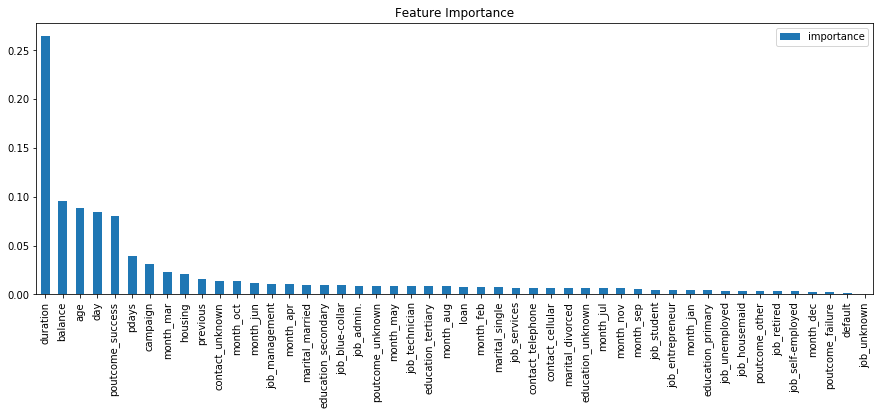

In [113]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance')

In [114]:
# Select the 25 most importance features
X_train_scaled_imp = X_train_scaled[feature_importances.index[range(25)]]
X_train_scaled_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15824 entries, 0 to 15823
Data columns (total 25 columns):
duration               15824 non-null float64
balance                15824 non-null float64
age                    15824 non-null float64
day                    15824 non-null float64
poutcome_success       15824 non-null float64
pdays                  15824 non-null float64
campaign               15824 non-null float64
month_mar              15824 non-null float64
housing                15824 non-null float64
previous               15824 non-null float64
contact_unknown        15824 non-null float64
month_oct              15824 non-null float64
month_jun              15824 non-null float64
job_management         15824 non-null float64
month_apr              15824 non-null float64
marital_married        15824 non-null float64
education_secondary    15824 non-null float64
job_blue-collar        15824 non-null float64
job_admin.             15824 non-null float64
poutcome_unknown 

In [116]:
X_val_scaled_imp = X_val_scaled[feature_importances.index[range(25)]]
X_val_scaled_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 25 columns):
duration               6782 non-null float64
balance                6782 non-null float64
age                    6782 non-null float64
day                    6782 non-null float64
poutcome_success       6782 non-null float64
pdays                  6782 non-null float64
campaign               6782 non-null float64
month_mar              6782 non-null float64
housing                6782 non-null float64
previous               6782 non-null float64
contact_unknown        6782 non-null float64
month_oct              6782 non-null float64
month_jun              6782 non-null float64
job_management         6782 non-null float64
month_apr              6782 non-null float64
marital_married        6782 non-null float64
education_secondary    6782 non-null float64
job_blue-collar        6782 non-null float64
job_admin.             6782 non-null float64
poutcome_unknown       6782 non-null f

## 6. Logistic Regression

### 6.1 Logistic Regression without Class Weight

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit1 = LogisticRegression(solver='liblinear')

#fit the refined model
logit1.fit(X_train,y_train)

#make predictions
logit1_pred = logit1.predict(X_val)

### 6.2 Logistic Regression with Class Weight

In [159]:
# Assign class_weight as 10 for class 1 (class 0 will have 1 as class weight by default)
logit2 = LogisticRegression(class_weight={1:10}, solver='liblinear')

#fit the refined model
logit2.fit(X_train,y_train)

#make predictions
logit2_pred = logit2.predict(X_val)

### 6.3 Comparing the Performance

In [160]:
# Calculate AUC
metrics.roc_auc_score(y_val, logit1_pred)

0.6678899185755374

In [161]:
# Calculate AUC
metrics.roc_auc_score(y_val, logit2_pred)

0.8380965800392697

It is obvious that the logistic regression works great with imbalance issue solved

## 7. Neural Network

In [162]:
from sklearn import neural_network

In [163]:
# Specify an ANN model, use 1 hidden layer with 20 nodes, using all features
ann1 = neural_network.MLPClassifier(alpha=1e-5,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [164]:
#fit model
ann1.fit(X_train_scaled, y_train)

C:\Users\Ang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [165]:
# Predict on test set
ann1_pred = ann1.predict(X_val_scaled)

In [166]:
metrics.roc_auc_score(y_val, ann1_pred)

0.7047672249302613

In [167]:
# Specify an ANN model, use 3 hidden layer with 20,15,10 nodes, using all features
ann2 = neural_network.MLPClassifier(alpha=1e-5,
                                   hidden_layer_sizes=(20,15,10),
                                   random_state=1)
#fit model
ann2.fit(X_train_scaled, y_train)

# Predict on test set
ann2_pred = ann2.predict(X_val_scaled)

C:\Users\Ang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [168]:
metrics.roc_auc_score(y_val, ann2_pred)

0.7196014194137764

In [169]:
# Specify an ANN model, use 3 hidden layer with 20,15,10 nodes
ann3 = neural_network.MLPClassifier(alpha=1e-5,
                                   hidden_layer_sizes=(20,15,10),
                                   random_state=1)
#fit model
ann3.fit(X_train_scaled_imp, y_train)

# Predict on test set
ann3_pred = ann3.predict(X_val_scaled_imp)

C:\Users\Ang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [170]:
metrics.roc_auc_score(y_val, ann1_pred)

0.7047672249302613

## 8. Summary of All Methods

After building the model, now we need to test our model on the real-world data. We have a test dataset which has never been used duing the modeling. Here we will use it to test our model's generalizability on real-problem data.

### 8.1 Prepare Test Data for Use

In [171]:
os.listdir()

['.ipynb_checkpoints',
 'Data_Competition_2.ipynb',
 'IST 5520 Data Competition II.pdf',
 'test.csv',
 'train.csv',
 'Yao_data competition 2.ipynb']

In [172]:
#import test data
test_dat = pd.read_csv('test.csv')

In [173]:
test_dat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
1,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
2,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0
3,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,0
4,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,0


In [174]:
#one-hot encoding
#get dummy variables
job = pd.get_dummies(test_dat['job'], prefix = 'job')
marital = pd.get_dummies(test_dat['marital'], prefix = 'marital')
education = pd.get_dummies(test_dat['education'], prefix = 'education')
contact = pd.get_dummies(test_dat['contact'], prefix = 'contact')
month = pd.get_dummies(test_dat['month'], prefix = 'month')
poutcome = pd.get_dummies(test_dat['poutcome'], prefix = 'poutcome')

In [175]:
#change string variables
default = test_dat.default.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no
housing = test_dat.housing.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no
loan = test_dat.loan.replace(['no','yes'],[0,1]) # 1 as yes, 0 as no


In [176]:
# Concat all dummies, modified string variables, and continuous variables to create predictors X
X_test = pd.concat([job,marital,education,contact,month,poutcome,
               default,housing,loan,
               test_dat[['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
               'previous']]
              ],
              axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 48 columns):
job_admin.             22605 non-null uint8
job_blue-collar        22605 non-null uint8
job_entrepreneur       22605 non-null uint8
job_housemaid          22605 non-null uint8
job_management         22605 non-null uint8
job_retired            22605 non-null uint8
job_self-employed      22605 non-null uint8
job_services           22605 non-null uint8
job_student            22605 non-null uint8
job_technician         22605 non-null uint8
job_unemployed         22605 non-null uint8
job_unknown            22605 non-null uint8
marital_divorced       22605 non-null uint8
marital_married        22605 non-null uint8
marital_single         22605 non-null uint8
education_primary      22605 non-null uint8
education_secondary    22605 non-null uint8
education_tertiary     22605 non-null uint8
education_unknown      22605 non-null uint8
contact_cellular       22605 non-null uint8
contact_tel

In [177]:
# Create outcome variable y.
y_test = test_dat['y'].copy()
y_test.value_counts()

0    19961
1     2644
Name: y, dtype: int64

In [178]:
X_test.shape

(22605, 48)

In [179]:
y_test.shape

(22605,)

In [186]:
#normalize testing data
#transform testing data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns

In [187]:
#create X_test with top 25 important features
X_test_scaled_imp = X_test_scaled[feature_importances.index[range(25)]]
X_test_scaled_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 25 columns):
duration               22605 non-null float64
balance                22605 non-null float64
age                    22605 non-null float64
day                    22605 non-null float64
poutcome_success       22605 non-null float64
pdays                  22605 non-null float64
campaign               22605 non-null float64
month_mar              22605 non-null float64
housing                22605 non-null float64
previous               22605 non-null float64
contact_unknown        22605 non-null float64
month_oct              22605 non-null float64
month_jun              22605 non-null float64
job_management         22605 non-null float64
month_apr              22605 non-null float64
marital_married        22605 non-null float64
education_secondary    22605 non-null float64
job_blue-collar        22605 non-null float64
job_admin.             22605 non-null float64
poutcome_unknown 

### 8.2 Compute AUC Performace

In [188]:
#make predictions with all models

#tuned knn model
knn1_pred = knn1.predict(X_test)

#Gaussian Naive Bayes model
gauss_nb_pred = gauss_nb.predict(X_test)

#Bernouli Naive Bayes model
bernou_nb_pred = bernou_nb.predict(X_test)

#Decision Tree model
dt_pred = dt.predict(X_test)

#Random Forest Final model
rf_pred = rf.predict(X_test)

#Logistic Regression without class weight
logit1_pred = logit1.predict(X_test)

#Logistic Regression with class weight
logit2_pred = logit2.predict(X_test)

#ANN with 3 layer of 20,15,10 nodes, using all features
ann_2_pred = ann2.predict(X_test_scaled)

##ANN with 3 layer of 20,15,10 nodes, using important features
ann3_pred = ann3.predict(X_test_scaled_imp)


In [189]:
auc  = [metrics.roc_auc_score(y_test, knn1_pred),
       metrics.roc_auc_score(y_test, gauss_nb_pred),
       metrics.roc_auc_score(y_test, bernou_nb_pred),
       metrics.roc_auc_score(y_test, dt_pred),
       metrics.roc_auc_score(y_test, rf_pred),
       metrics.roc_auc_score(y_test, logit1_pred),
       metrics.roc_auc_score(y_test, logit2_pred),
       metrics.roc_auc_score(y_test, ann_2_pred),
       metrics.roc_auc_score(y_test, ann3_pred),
       ]

In [190]:
pd.DataFrame({'AUC score':auc},
             index = ['k-NN (k=1)',
                      'Gaussian Naive Bayes',
                      'Bernoulli Naive Bayes',
                      'Decision Tree',
                      'RF without Hyperparameter Tunning',
                     'Logistic Regression without class weight',
                     'Logistic Regression with class weight',
                     'ANN with 3 layer of 20,15,10 nodes, using all features',
                     'ANN with 3 layer of 20,15,10 nodes, using important features'])

,AUC score
k-NN (k=1),0.517374
Gaussian Naive Bayes,0.703082
Bernoulli Naive Bayes,0.636280
Decision Tree,0.692776
RF without Hyperparameter Tunning,0.708833
Logistic Regression without class weight,0.663551
Logistic Regression with class weight,0.834872
"ANN with 3 layer of 20,15,10 nodes, using all features",0.718247
"ANN with 3 layer of 20,15,10 nodes, using important features",0.730157


It is obviously that Logistic Regression with class weight model has the highest AUC. The value of AUC is about 0.835, whcih is higher than 0.720. Also, ANN with 3 layer of 20,15,10 nodes, using important features, could get an AUC (0.730) larger than 0.720.